# Modulation <a id="SubSec-Information"></a>

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Modulation - Einführung | Nachrichtentechnik (BrainGain)

<iframe width="200" height="113" src="https://www.youtube.com/embed/wL3boxXlo2s?si=pWNL4QjQwnXVULLh" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::


Im Bereich der Messtechnik spielt die Modulation eine zentrale Rolle, da sie es ermöglicht, physikalische Messgrößen oder Messsignale auf eine bestimmte Signalform zu übertragen. Ein anschauliches Beispiel hierfür ist die Verwendung von Sinusschwingungen mit den Parametern Amplitude, Phase und Frequenz. Hierbei wird die physikalische Messgröße in einen dieser Parameter moduliert, indem die Amplitude, Phase oder Frequenz entsprechend angepasst werden – dies verleiht der Sinusschwingung Informationen über die gemessene Größe, beispielsweise in ihrer Frequenz.
Dieser Ansatz hat einen klaren Vorteil: Die Frequenz eines Messsignals ist äußerst unempfindlich gegenüber Störungen aus der Umgebung, im Vergleich zur Amplitude, die leichter verfälscht oder abgeschwächt wird. Ein weiterer Pluspunkt besteht darin, dass die Frequenz eines Messsignals einfach digitalisiert werden kann, wodurch die physikalische Größe schnell in digitaler Form zur Verfügung steht.

Ein praktisches Beispiel dafür wäre die Verwendung einer Trigger-Einrichtung, die die Frequenz eines Messsignals in Pulse umwandelt und sie mit einer bestimmten Wiederholrate – also der Frequenz des Signals – zur Verfügung stellt. Diese Pulse werden dann innerhalb eines definierten Zeitfensters gezählt. In späteren Abschnitten werden wir uns ausführlicher mit solchen "Frequenzzählern" beschäftigen. Für die Realisierung dieser Art von Messsignal ist eine Modulation des Ausgangssignals erforderlich, um die physikalische Größe, beispielsweise ein Audiosignal, auf den Träger, wie etwa eine Radiowelle, zu übertragen.


## Träger- und Nutzsignale

In der Welt der Signalübertragung spielen Trägersignale und Nutzsignale eine grundlegende Rolle. Klassischerweise wird eine sinusförmige Schwingung mit konstanter Frequenz und Amplitude als **Trägerschwingung** verwendet. Durch Modulation können verschiedene Parameter der Trägerschwingung beeinflusst werden:

- Die **Amplitude** kann moduliert werden, was als Amplitudenmodulation (AM) bekannt ist.
- Die **Frequenz** kann moduliert werden, was als Frequenzmodulation (FM) bezeichnet wird.
- Die **Phase** kann verschoben werden, wodurch Phasenmodulation (PM) entsteht.

Die Demodulation ist ein entscheidender Schritt, um den ursprünglichen zeitlichen Verlauf der physikalischen Größe zurückzugewinnen.

**Nutzsignale** wie Sprache oder Musik können oft nicht direkt über gängige Übertragungsmedien, wie beispielsweise einen Funkkanal, übertragen werden. Stattdessen wird ein Trägersignal benötigt, um das Nutzsignal effektiv zu übertragen. Nehmen wir an, wir haben ein sinusförmiges Nutzsignal (*message*) gegeben:

$$m(t) = A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t)$$

mit der Amplitude $A_\mathrm{m}$ und der Frequenz $f_\mathrm{m} = 100\,\mathrm{Hz}$. Betrachten wir zunächst ein *sinusförmiges* Trägersignal (*carrier*):

$$s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

Hierbei repräsentiert $A_c$ die Amplitude und $f_c$ die Trägerfrequenz. Die Konstante $p_0$ stellt die Phase zum Zeitpunkt $t=0$ dar. Die folgenden Diagramme zeigen beide Signale für $f_\mathrm{m} = 100\,\mathrm{Hz}$ und $f_c = 1\,\mathrm{kHz}$.

Nutzsignale wie Sprache weisen Frequenzen im Bereich von 500 Hz bis 10 kHz auf (wobei Männer tendenziell tiefere und Frauen höhere Frequenzen verwenden). Diese Frequenzen sind zu niedrig, um direkt über Funkkanäle (im Bereich von 200 MHz bis 5 GHz) übertragen zu werden. Aus diesem Grund wird zunächst ein hochfrequenter Träger mithilfe einer Oszillatorschaltung erzeugt:

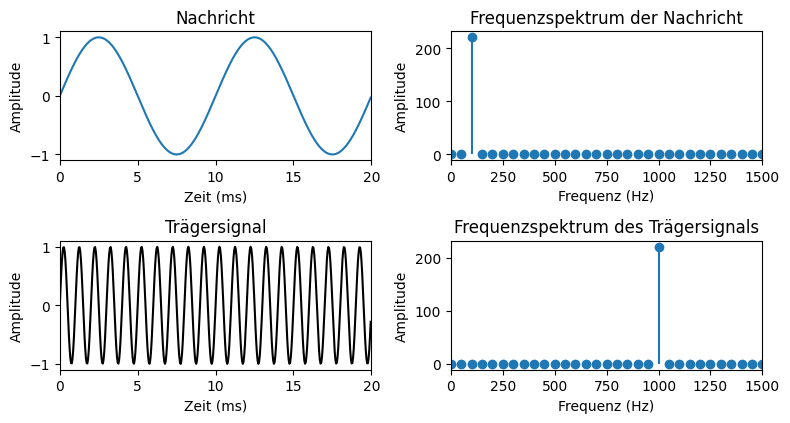

In [1]:
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib-Einstellungen:
plt.style.use('default')
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 10

# Parameter für die Signale
Fs = 22050.0  # Abtastrate
Ts = 1.0 / Fs  # Abtastintervall
t = np.arange(0, 0.02, Ts)  # Zeitvektor
ff = 1000  # Frequenz des Trägersignals
f_m = 100  # Frequenz des Nutzsignals

# Funktion zur Erzeugung einer Sinusschwingung
f = lambda freq, ampl, t: ampl * np.sin(2 * np.pi * freq * t)

# Erzeugen der Signale
y_nutz = f(f_m, 1.0, t)
y_nutz_norm = y_nutz / np.max(y_nutz)
y_träger = f(ff, 1.0, t)

# Plot für die Nachricht
plt.subplot(3, 2, 1)
plt.plot(1000*t, y_nutz_norm, 'tab:blue')
plt.xlim([0,20])
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.title('Nachricht')

# Plot für das Trägersignal
plt.subplot(3, 2, 3)
plt.plot(1000*t, y_träger, 'k')
plt.xlim([0,20])
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.title('Trägersignal')

# Frequenzspektrum der Nachricht
plt.subplot(3, 2, 2)
N = len(y_nutz_norm)
frequencies = rfftfreq(N, Ts)
y_nutz_fft = rfft(y_nutz_norm)
plt.stem(frequencies, np.abs(y_nutz_fft), 'tab:blue', markerfmt='o', basefmt=" ", linefmt='-')
plt.xlim([0,1500])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequenzspektrum der Nachricht')

# Frequenzspektrum des Trägersignals
plt.subplot(3, 2, 4)
y_träger_fft = rfft(y_träger)
plt.stem(frequencies, np.abs(y_träger_fft), 'k', markerfmt='o', basefmt=" ", linefmt='-')
plt.xlim([0,1500])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequenzspektrum des Trägersignals')


plt.tight_layout()
plt.show()


## Amplitudenmodulation (AM)

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Amplitudenmodulation (Elektrotechnik in 5 Minuten by Alexander Stöger)

<iframe width="200" height="113" src="https://www.youtube.com/embed/V2093xv_198?si=GHujyQ44WNaZR4IS" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Amplitudenmodulation - einfach erklärt (Förderverein des Rundfunkmuseums der Stadt Fürth)

<iframe width="200" height="113" src="https://www.youtube.com/embed/fpUHCdD-X60?si=9abV2DdRYWafeCg2" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Die Amplitudenmodulation kennt ihr vom Radio, wenn ihr die AM Taste drückt.  
Mittels Amplitudenmodulation kann das Nutzsignal $m(t)$, was z.B. Sprache oder Musik ist, in einen anderen Frequenzbereich verschoben. 
Durch das Verschieben können auch mehrere Nutzsignale gleichzeitig und ohne gegenseitige Störung übertragen werden. 

$$y_\mathrm{AM}(t) = \left[A_c + M_a \cdot m(t)\right] \cdot \sin(2\pi  f_c  t)$$

$M_a$ ist die Modulationsstärke und $m(t)$ die modulierende Funktion oder kurz der Modulator (z.B. Sprache oder Musik). Alternativ zur Modulationsstärke könnte man auch das Nutzsignal vorher um den Gleichanteil verschieben, um zu verhindern, dass die Amplitudemodulation in den negativen Bereich moduliert.  

Setzt man beispielsweise ein sinusförmiges Nutzsignal ein, so erhält man für eine sinusfürmige Trägerschwingung:

$$
\begin{align} 
y_\mathrm{AM}(t) & = \left[A_c + M_a \cdot A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t)\right] \cdot \sin(2\pi  f_c  t) \\
& = A_c \sin(2\pi  f_c  t)  + \frac{M_a A_m}{2} \left[ \cos\{2\pi(f_m-f_c)t \} - \cos\{2\pi(f_m+f_c)t \} \right]
\end{align} 
$$

:::{admonition} Aufgabe
:class: tip
Beweise die obige Umformung mithilfe der trigonometrischen Umrechnungsformel 

$$\sin \alpha \sin \beta ={\frac {1}{2}}{\bigl (}\cos(\alpha -\beta )-\cos(\alpha +\beta ){\bigr )} !
$$

:::

Aus der Formel kann man das entstandene Frequenzspektrum ablesen (siehe [Fourier-Analyse](3_FourierAnalyse.ipynb)). Vorne in der Formel steht das Trägersignal mit der Frequenz $f_c$ und hinten stehen zwei Terme, die sogenannten Seitenbänder, mit den Frequenzen $f_m-f_c$ und $f_m + f_c$. Diese einfachste Modulationsart der AM nennt man deshalb auch **Zweiseitenbandmodulation (ZSB oder englisch DSB)** mit Träger. Hier steckt die Information in den Seitenbändern, während der Träger selbst bei der Übertragung nur unnötigen Ballast darstellt. Wenn sich die Amplitude des Nutzsignals ändert, ändert sich auch die Amplitude der Seitenfrequenzen. Wenn sich die Frequenz des modulierenden Signals ändert, ändern sich auch die Frequenzen der Seitenbänder. 

Eine Amplitudenmodulation für einen Modulationsgrad von 0,5 sieht wie folgt für die beiden oben definierten Nutz- und Trägersignale aus:

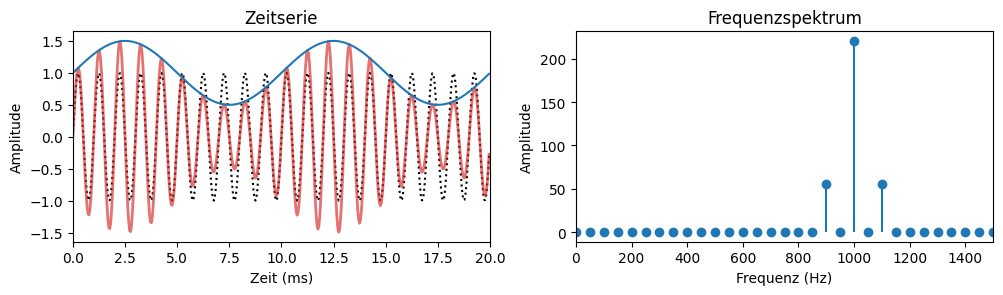

In [2]:
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib-Einstellungen:
plt.style.use('default')
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 10

# Parameter für die Signale
Fs = 22050.0  # Abtastrate
Ts = 1.0 / Fs  # Abtastintervall
t = np.arange(0, 0.02, Ts)  # Zeitvektor
ff = 1000  # Frequenz des Trägersignals
f_m = 100  # Frequenz des Nutzsignals

# Funktion zur Erzeugung einer Sinusschwingung
f = lambda freq, ampl, t: ampl * np.sin(2 * np.pi * freq * t)

# Erzeugen der Signale
y_nutz = f(f_m, 1.0, t)
y_nutz_norm = y_nutz / np.max(y_nutz)
y_träger = f(ff, 1.0, t)

A = 1.0
M_a = 0.5
AM = (A+M_a*y_nutz_norm)*f(ff,1.0,t)

# Plot für die Nachricht
plt.subplot(3, 2, 1)
plt.plot(t*1000, y_träger, 'k', ls=':', label = 'Träger')
plt.plot(t*1000,AM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t*1000, (A+M_a*y_nutz_norm), 'tab:blue', label = 'Einhüllende')
plt.xlim([0,20])
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.title('Zeitserie')


# Frequenzspektrum der Nachricht
plt.subplot(3, 2, 2)
N = len(y_nutz_norm)
frequencies = rfftfreq(N, Ts)
y_nutz_fft = rfft(AM)
plt.stem(frequencies, np.abs(y_nutz_fft), 'tab:blue', markerfmt='o', basefmt=" ", linefmt='-')
plt.xlim([0,1500])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequenzspektrum')




plt.tight_layout()
plt.show()


### Demodulation

Es gibt prinzipiell zwei Möglichkeiten die Modulation rückgängig zu machen, um das ursprüngliche Nutzsignal zu rekonstruieren:

Bei schwachen oder stark gestörten Signalen wird auf der Empfängerseite ein lokaler Träger benutzt, der in Phase zum Träger des empfangenen Signals ist. Beide Träger sind synchron und damit kohärent zu einander. Dieses Verfahren ist technisch gesehen aufwendiger als die zweite Option.
Zunächst wird das empfangene Signal, $y_\mathrm{AM}(t)$, bestehend aus den beiden Seitenfrequenzen und dem Träger, mit dem lokalen Träger multipliziert und anschließend werden die hohen Frequenzanteile $2f_c$ mit einem Tiefpass und der Gleichanteil mit einem Hochpass heraus gefiltert. Das gesuchte Nutzsignal bleibt übrig, jedoch nur mit halber Amplitude:

$$
\begin{align} 
y_\mathrm{AM,demod}(t) &= y_\mathrm{AM}(t) \cdot s(t) \\
& = \left[ A_c \sin(2\pi  f_c  t)  + \frac{M_a A_m}{2} \left[ \cos\{2\pi(f_m-f_c)t \} - \cos\{2\pi(f_m+f_c)t \} \right] \right]  \cdot A_c \sin(2\pi f_c t + p_0) \\
&= \frac{A_m}{2} \sin(2 \pi f_m t)
\end{align}
$$
    
:::{admonition} Aufgabe
:class: tip
Beweise die obige Umformung unter Vernachlässigung der hohen Frequenzanteile $2f_c$ und des Gleichanteils.
:::

Diese einfachste Form der Demodulation kommt ohne die aufwendige Erzeugung eines lokalen Trägers aus und ermöglichte deshalb vor hundert Jahren die Verbreitung von Rundfunksendern. Das Verfahren ist allerdings nur bei ausreichend starken Signalen anwendbar und erfordert im Regelfall einen vorhergehenden Verstärker. Hier wird das gesuchte Frequenzband mit einem Bandpass herausgefiltert, anschließend mit einer Diode gleichgerichtet und zum Schluss mit einem Tiefpass geglättet. Der enthaltene Gleichanteil wird gegebenenfalls mit einem Hochpass entfernt.

Auf Grund der Einfachheit dieses Verfahrens kann das empfangene Signal leicht durch Verzerrungen gestört werden. 

## Phasenmodulation  (PM)

Die Amplitudenmodulation ist sehr störanfällig, daher benutzt man heutzutage nur noch Frequenz- oder Phasenmodulationen. 
Frequenzmodulation und Phasenmodulation hängen mathematisch eng zusammen. Eine Phasenmodulation eines sinusförmigen Trägers kann man sehr einfach ausdrücken. Zunächst der unmodulierte Träger:

$$ s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

Wir können die momentane Phase als Funktion der Zeit schreiben: 

$$ p(t)=(\omega_{c}t+p_{0}) $$

mit der Kreisfrequenz $\omega_c = 2 \pi f_c$.

Nun wird die momentane Phase durch Addition eines Modulators verändert, dadurch entsteht der Ausdruck für eine Phasenmodulation:

$$ y_\mathrm{PM}(t)= A_c \sin\left(2\pi f_c t  +p_0 + M_p m(t)\right)$$

Dabei ist $M_{p}$ die Modulationsstärke und $m(t)$ die modulierende Funktion oder kurz der Modulator, hier die entsprechende Nachricht. Entsprechend:

$$ p(t)=2\pi f_c t+p_{0}+M_{p}m(t)$$

Man sieht, dass eine Phasenmodulation mathematisch sehr einfach auszudrücken ist.

## Frequenzmodulation (FM)

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Understanding Frequency Modulation (englisch, Rohde Schwarz)

<iframe width="200" height="113" src="https://www.youtube.com/embed/gFu7-7lUGDg?si=64C6DmJoCTTOecj5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::


Die Amplitudenmodulation (AM) wird heutzutage oft durch die Frequenzmodulation (FM) ersetzt, da die Qualitätsanforderungen gestiegen sind und moderne Bauelemente die FM-Technik effizienter, kostengünstiger und energieeffizienter gestalten. FM bietet auch einen größeren Dynamikbereich für die Übertragung von Informationen und ist weniger anfällig für Störungen. Dies macht FM zur bevorzugten Wahl für Anwendungen wie das FM-Radio und die bidirektionale Kommunikation per Funk.

Die Grundidee der Frequenzmodulation besteht darin, die momentane Frequenz des Trägersignals $\omega_c$ kontinuierlich zu ändern, um Informationen zu übertragen. Dies kann nicht mehr einfach durch den linearen Term $\omega_c t = 2\pi f_c t$ ausgedrückt werden. Stattdessen verwenden wir den Begriff der momentanen Kreisfrequenz:

$$\omega(t) = \frac{d}{dt}p(t)$$

Hier ist $p(t)$ die sich ständig ändernde Phase. Die momentane Frequenz $\omega (t)$ ist die zeitliche Ableitung der Phasenfunktion, ähnlich zur Beziehung zwischen Geschwindigkeit und Ortsveränderung oder der Analogie zwischen Phase und Ort sowie Frequenz und Geschwindigkeit.

In der Frequenzmodulation wird gefordert, dass sich die momentane Frequenz des Trägersignals, $\omega_c$, ändert:

$$\omega (t)=\omega_c+M_{f} m(t) = \omega_c + \Delta \omega$$ 

oder

$$f (t)=f_c+ \frac{1}{2\pi}M_{f} m(t) = f_c + \Delta f$$ 

Hierbei repräsentiert $M_f$ die Modulationstärke und $m(t)$ die modulierende Funktion, auch als *message* bezeichnet. $\Delta f$ ist die resultierende Frequenzänderung oder der Frequenzhub (englisch: *deviation*) aufgrund der Modulation. Der Wert von $\Delta f$ kann sowohl negativ als auch positiv sein. Zum Beispiel bewirkt eine Frequenzänderung von $\Delta f = +15\,\mathrm{kHz}$, dass der Träger um 15 kHz über $f_c$ verschoben wird. Häufig wird mit $\Delta f$ die *maximale* Frequenzänderung $\Delta f_\mathrm{max}$ bezeichnet, um die die Trägerfrequenz $f_c$ maximal verschoben wird. Der genaue Wert von $\Delta f_\mathrm{max}$ hängt vom Design des Senders, der Konfiguration und den Anforderungen der jeweiligen Anwendung ab.

Um die Kurvenform zu einem bestimmten Zeitpunkt zu berechnen, benötigen wir jedoch nicht die momentane Frequenz, sondern die Phasenfunktion. Da die Frequenz die Ableitung der Phase ist, ist die Phase das Integral der Frequenz:

$$ p(t)=\int \omega (t)\,\mathrm {d} t $$

Wenn wir dies in die Gleichung für die momentane Frequenz einsetzen, erhalten wir:

$$ p(t)=\int \omega_c+M_{f} m(t)\,\mathrm {d} t = \omega_c t + p_0 + M_{f} \int  m(t)\,\mathrm {d} t$$

Somit ergibt sich für die Frequenzmodulation folgender Ausdruck:

$$y_\mathrm{FM}(t) = A_c \cdot \sin\left(2\pi f_c t + p_0 + M_f\int m(t) dt \right)$$

Wenn wir ein beliebiges Signal mit einer beliebigen Frequenz $f_m$ in diese Gleichung einsetzen, erhalten wir:

$$
\begin{align}
y_\mathrm{FM}(t) &= A_c \cdot \sin\left(2\pi f_c t + p_0 + M_f\int A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t) dt \right)\\
 &= A_c \cdot \sin\left(2\pi f_c t + p_0 - \frac{M_f A_\mathrm{m}}{2 \pi f_\mathrm m} \cdot \cos(2\pi f_\mathrm{m} t) \right)\\
\end{align}
$$

Der **Modulationsindex** (englisch: *deviation ratio*) wird als Verhältnis von maximaler Frequenzänderung zu maximaler Modulationsfrequenz (*message*) definiert:

$$\eta = \frac{\Delta f}{f_m}$$

Hierbei steht $f_m$ für die maximale Frequenz im zu übertragenden Nachrichtensignal. Je nach Anwendung können unterschiedliche Modulationsindizes gewählt werden. In der Musik gibt es beispielsweise sehr hohe Frequenzen, weshalb eine große Frequenzänderung $\Delta f$ erforderlich ist, um einen hohen Modulationsindex und somit eine höhere Übertragungsqualität zu erreichen. Bei der Übertragung von Sprache mit eher niedrigen Frequenzen kann eine kleinere Frequenzänderung verwendet werden. Der Modulationsindex kann durch die Wahl der Frequenzänderung angepasst werden, und es wird grundsätzlich zwischen **breitbandiger** FM (wenn $\eta > 1$) und **schmalbandiger**




## Vergleich zwischen AM, PM und FM

Um die Unterschiede zwischen Amplitudenmodulation (AM), Phasenmodulation (PM) und Frequenzmodulation (FM) zu verdeutlichen, betrachten wir ein sinusförmiges Nachrichtensignal, \(m(t) = A_{m} \cdot \sin(2\pi f_\mathrm{m} t)\), mit \(A_m=1\) und \(A_c=1\), und setzen es in die Formeln für PM und FM ein:

$$ y_\mathrm{PM}(t) = \sin\left(2\pi f_c t  + p_0 + M_p \sin[2\pi f_m t]\right)$$

$$y_\mathrm{FM}(t) = \sin\left(2\pi f_c t + p_0 - \frac{M_f}{2\pi f_m}\cos[2\pi f_m t] \right)$$

Hier sind einige wichtige Beobachtungen:

* Der Phasenhub (PM) bleibt unverändert bei \(M_{p}\).
* Der Phasenhub (FM) hängt von \(\frac {M_{f}}{\omega_m}\) ab.
* Die momentane Frequenz für PM wird durch \(\omega_c+M_{p}\omega_m\cos(\omega_m t+p_{m})\) bestimmt.
* Die momentane Frequenz für FM wird durch \(\omega_c+M_{f} \sin \left(\omega _{m}t+p_{m}\right)\) bestimmt.

In beiden Fällen erfolgt eine Modulation der Phase. Der Unterschied besteht darin, wie der Modulator auf die Phase einwirkt. Bei der Frequenzmodulation ist es notwendig, das Integral des Modulators zu berechnen, was eine Tiefpasswirkung hat. Das führt dazu, dass der Phasenhub bei steigender Modulatorfrequenz abnimmt, während der Frequenzhub bei Phasenmodulation mit sinkender Modulatorfrequenz abnimmt.

Wie bereits erwähnt, sind FM und PM unempfindlich gegenüber Änderungen in der Amplitude, was sie ideal für mobile Kommunikationsgeräte macht, bei denen sich die Umgebungsbedingungen schnell ändern können. In Anwendungen, in denen die Amplitude nicht zur Informationsübertragung verwendet wird, können nichtlineare Verstärker verwendet werden. Diese Verstärker sind energieeffizienter und verlängern die Batterielaufzeit, was für mobile Kommunikation von entscheidender Bedeutung ist.

Es ist jedoch wichtig zu beachten, dass FM im Vergleich zu anderen Modulationsmethoden wie AM und Single Sideband (SSB) eine höhere Bandbreite benötigt, was ihre spektrale Effizienz beeinträchtigt. Die Bandbreite eines FM-Signals hängt vom Frequenzhub (\textit{deviation}) ab.

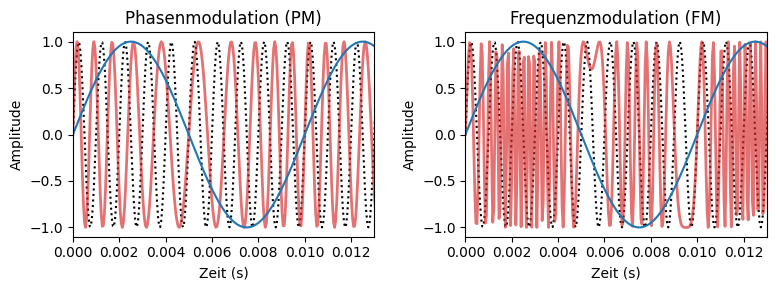

In [6]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
A = 1.0
M_p = 4.0
PM = A * np.sin(2*np.pi*ff*t + M_p*y_nutz_norm)
plt.subplot(1,2,1)
plt.plot(t, y_träger, 'k', ls=':', label = 'Träger')
plt.plot(t,PM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('Phasenmodulation (PM)')
plt.xlim([0.0,0.013])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')

# FM
M_f = 1.0
FM = A * np.sin(2*np.pi*ff*t + M_f*(np.cumsum(y_nutz_norm)))
plt.subplot(1,2,2)
plt.plot(t, y_träger, 'k', ls=':', label = 'Träger')
plt.plot(t,FM, 'tab:red', lw=2, alpha = 0.65, label = 'FM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('Frequenzmodulation (FM)')
plt.xlim([0.0,0.013])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Puls-Modulation

Häufig werden auch Rechteckpulsfolgen als Trägerschwingung verwendet wie z.B. {numref}`puls_trager` in dargestellt. 

:::{figure-md} puls_trager
<img src="draw/puls_träger.jpg" alt="puls_träger" class="bg-primary mb-1" width="600px" label = puls_trager>

Nachricht und Trägersignal, was auf einer Pulsreihe basiert.
:::

Ähnlich wie bei der Sinusschwingung können auch hier verschiedene Modulationen, dargestellt in {numref}`pulsmod`,  vorgenommen werden, die größtenteils selbsterklärend sind (wie Pulsamplitudenmodulation oder Pulsdauermodulation). Nur die Pulscode-Modulation ist etwas anders und besonders. Hierbei wird das Messsignal kodiert und besteht aus einer Folge von Pulsgruppen. Diese Aneinanderreihung von Pulsgruppen entspricht einem bestimmten Alphabet. Vorteil dieser Variante ist, dass nur noch zwei Zustände, nämlich 0 und 1, in einer bestimmten Reihenfolge verarbeitet werden müssen. D.h. diese Art von Signalen ist direkt im Computer weiterverarbeitbar, ohne vorangegangen Analog-Digital-Wandlung. 

:::{figure-md} pulsmod
<img src="draw/pulsmod.jpg" alt="pulsmod" class="bg-primary mb-1" width="900px" label = pulsmod>

Drei Varianten die Nachricht aus {numref}`puls_trager` auf eine Pulsreihe zu modulieren: Es kann die Pulsdauer, Pulsamplitude oder als Code moduliert werden. 
:::

Auch hier gilt natürlich, dass eine entsprechende Demodulation nachgeschaltet werden muss, um das eigentliche Signal zurück zu gewinnen. 

